---
# **1. Introduction**

  * **NAME  : JOHN KRISTIAN VIERI**
  * **BATCH : 11**


---

# **About Dataset**
*Data
The following data is intended for advancing financial sentiment analysis research. It's two datasets (FiQA, Financial PhraseBank) combined into one. It provides financial sentences with sentiment labels*

---

# **Notebook References**

- https://www.kaggle.com/code/bertcarremans/deep-learning-for-sentiment-analysis/notebook

- https://colab.research.google.com/drive/1GgH4hmMGmYiJPk5EiZf4_9FUmqBuCahe#scrollTo=G-jtN0sOE6ZM

---

# **2. Import Library**

In [ ]:
#####################################################################
import numpy as np  # Linear Algebra 
import pandas as pd # Data Manipulation
import re           # Text Manipulation
import collections  # Storing data
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # determine relationship
#####################################################################
from sklearn.model_selection import train_test_split # Train data and test data
import tensorflow as tf # Train with neural network
from sklearn.metrics import classification_report # Classification evaluation
#####################################################################
# Modelling
from keras import models
from keras import layers
from keras import regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from tensorflow.keras.layers import LSTM
#####################################################################
# Text Processing
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords 
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import TextVectorization, Embedding 
from tensorflow.keras.layers import GRU
nltk.download('stopwords')
nltk.download('punkt')
#####################################################################

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **3. Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Data/Milestone2P2-Dataset.csv')

In [ ]:
df.shape

(5842, 2)

# **4.Exploratory Data Analysis**

### 4.1 - *Words Sampling*

In [ ]:
# Define sample by target label
good_sentence=df[df['Sentiment']=='positive']['Sentence']
bad_sentence=df[df['Sentiment']=='negative']['Sentence']
net_sentence=df[df['Sentiment']=='neutral']['Sentence']
# Showin result
print('-------------------------------------------------------------')
print(' 5 samples of sentence ')
print('-------------------------------------------------------------')
print("1. Good sentence :\n".format(),good_sentence[:5])
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
print("2. Bad sentence :\n".format(),bad_sentence[:5])
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
print("3. Neutral sentence :\n".format(),net_sentence[:5])
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')

-------------------------------------------------------------
 5 samples of sentence 
-------------------------------------------------------------
1. Good sentence :
 0     The GeoSolutions technology will leverage Bene...
2     For the last quarter of 2010 , Componenta 's n...
5       $SPY wouldn't be surprised to see a green close
8     Kone 's net sales rose by some 14 % year-on-ye...
10    Circulation revenue has increased by 5 % in Fi...
Name: Sentence, dtype: object
-------------------------------------------------------------
-------------------------------------------------------------
2. Bad sentence :
 1     $ESI on lows, down $1.50 to $2.50 BK a real po...
6     Shell's $70 Billion BG Deal Meets Shareholder ...
7     SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...
11    $SAP Q1 disappoints as #software licenses down...
39    $AAPL afternoon selloff as usual will be bruta...
Name: Sentence, dtype: object
-------------------------------------------------------------
-------

### 4.2 - *Sentiment Count*

---------------------------------------------------------
---------------------------------------------------------
Total sentences by sentiment :
neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64
---------------------------------------------------------
---------------------------------------------------------


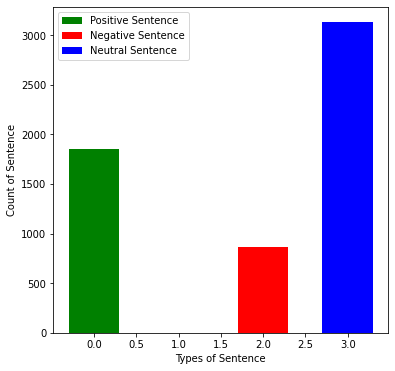

In [ ]:
# Sentiment count baseline
##################################################################
# Define count by sentiment
count = df['Sentiment'].value_counts()
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Total sentences by sentiment :")
print(count)
print("---------------------------------------------------------")
print("---------------------------------------------------------")
###################################################################
# Build plot function
def plot_counts(count_good,count_bad,count_net):
    plt.rcParams['figure.figsize']=(6,6)
    # Positive
    plt.bar(0,count_good,width=0.6,label='Positive Sentence',color='Green')
    plt.legend()
    # Negative
    plt.bar(2,count_bad,width=0.6,label='Negative Sentence',color='Red')
    plt.legend()
    # Neutral
    plt.bar(3,count_net,width=0.6,label='Neutral Sentence',color='Blue')
    plt.legend()
    # Define Label
    plt.ylabel('Count of Sentence')
    plt.xlabel('Types of Sentence')
    plt.show()
####################################################################    
# Define sentiment label    
count_good=df[df['Sentiment']=='positive']
count_bad=df[df['Sentiment']=='negative']
count_net=df[df['Sentiment']=='neutral']
# Showin Plot
plot_counts(len(count_good),len(count_bad),len(count_net))

## 4.3 - *Distribution of sentence by sentiment level*

Positive Sentence Words:0       32
2       39
5        9
8       18
10      17
        ..
5819    25
5824    46
5825    13
5836    18
5841    27
Name: Sentence, Length: 1852, dtype: int64
Negative Sentence Words:1       11
6        8
7       34
11      18
39      16
        ..
5829    12
5831    25
5832    14
5835    10
5837    17
Name: Sentence, Length: 860, dtype: int64
Neutral Sentence Words:3       20
4       23
9       33
13       7
14      36
        ..
5833    18
5834    15
5838    14
5839    16
5840    18
Name: Sentence, Length: 3130, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

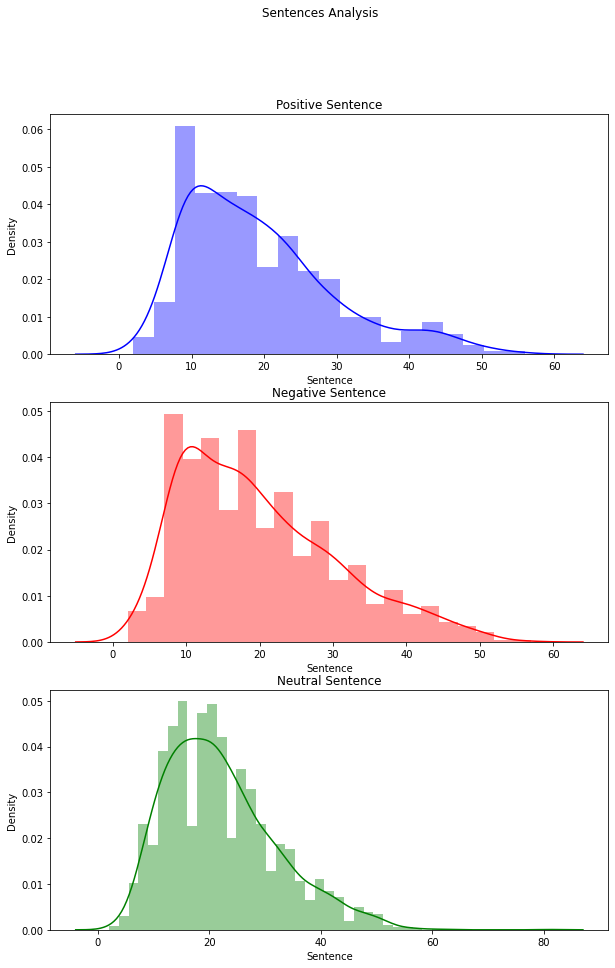

In [ ]:
# Baseline for analyze number of words in each Sentence


# Build function word length
def c_len(df):
    return len(df)

################################################################################

# Build a plot with seaborn to see the distribution of sentence by sentiment level
def plot_count(count_ones,count_zeros,count_two,title_1,title_2,title_3,subtitle):
# Define axis and size
    fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(10,15))
    # Distplot
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    sns.distplot(count_two,ax=ax3,color='Green')
    ax3.set_title(title_3)
    # Showin
    fig.suptitle(subtitle)
    plt.show()    


################################################################################

# Define count of 3 level sentiment
count_good_words=count_good['Sentence'].str.split().apply(lambda z:c_len(z))
count_bad_words=count_bad['Sentence'].str.split().apply(lambda z:c_len(z))
count_net_words=count_net['Sentence'].str.split().apply(lambda z:c_len(z))

# Print count words
print("Positive Sentence Words:" + str(count_good_words))
print("Negative Sentence Words:" + str(count_bad_words))
print("Neutral Sentence Words:" + str(count_net_words))

# Plot with plot_count function
plot_count(count_good_words,count_bad_words,count_net_words,"Positive Sentence","Negative Sentence","Neutral Sentence","Sentences Analysis")

################################################################################

## 4.4 - *Count Unique Character*

In [ ]:
# Total of unique character in each sentence
count_unique = pd.Series([char for sentence in df["Sentence"] for char in sentence]).unique()
print("Count unique chararacter:",len(count_unique))

Count unique chararacter: 119


In [ ]:
print(count_unique)

['T' 'h' 'e' ' ' 'G' 'o' 'S' 'l' 'u' 't' 'i' 'n' 's' 'c' 'g' 'y' 'w' 'v'
 'r' 'a' 'B' 'f' "'" 'P' 'b' 'p' 'd' 'L' ',' 'C' 'm' '.' '$' 'E' 'I' '1'
 '5' '0' '2' 'K' 'F' 'q' 'U' 'R' '3' '7' '6' 'z' '-' 'x' 'A' 'j' '4' 'k'
 'Y' 'D' 'M' 'H' 'O' 'N' 'X' '8' ':' '%' 'Q' '#' '?' '/' '9' 'V' '+' 'ñ'
 'J' '`' 'W' '@' '&' '(' ')' 'Z' 'ú' '!' '>' 'ó' 'Â' '£' '"' ';' 'à' '®'
 '¦' '=' 'ä' 'â' '€' '“' 'Ã' '¶' 'Ñ' '_' '📈' 'é' '…' '”' '^' 'á' '«' '|'
 '[' ']' '~' '{' '}' '¼' '¬' 'í' '<' 'Á' '’']


## 4.4 Conclusion

---

1. Sentences that have negative, neutral or positive sentiments have the same distribution, which is skewed to the right

2. Each sentence mostly has 20 words

3. Based on the target, most sentences are detected as neutral sentences and then followed by sentences with positive connotations

4. There are 119 unique sentences, which also include symbols that are not needed, so they will be cleaned, so as not to interfere with the prediction results.

---

# **5.Data Preprocessing**


## 5.1 - Data Inference

In [ ]:
# Define data inference with 10 samples
data_inf = df.sample(10, random_state=30)
data_inf

,Sentence,Sentiment
5143,The company also said that its board of direct...,neutral
1702,In 2007 Talentum will disclose three Interim R...,neutral
4610,"`` While concerns remain longer term , size an...",positive
326,( I&H ) in a move to enhance growth .,positive
535,It also turned to earnings per share ( EPS ) o...,positive
2776,"However , the orders received during the perio...",neutral
5370,Coca-Cola was the market leader of manufacture...,neutral
1532,"$SLW is down, but weekly $34 calls (-28.95%), ...",positive
2094,"Nonwovens and specialty papers , made by Ahlst...",neutral
3840,Finnish construction company YIT Oyj said on N...,positive


In [ ]:
# Drop index
data = df.drop(data_inf.index)
data 

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
# reset index
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## 5.2 - Text Preprocessing and Data Cleaning

### 5.2.1 - Missing Value

In [ ]:
# check missing value
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

### 5.2.2 - Case Folding



#### Split Dataset

In [ ]:
# split data and use stratify to equalize label percentage
train_data, test_data = train_test_split(df, test_size=0.15, random_state=77, stratify=df.Sentiment)
train_data, val_data = train_test_split (train_data, test_size=0.1, random_state=77, stratify=train_data.Sentiment)

In [ ]:
# define X_train,val and test
X_train,y_train = train_data.Sentence, train_data.Sentiment
X_val,y_val = val_data.Sentence, val_data.Sentiment
X_test,y_test = test_data.Sentence, test_data.Sentiment

#### Label Encoder

In [ ]:
# use encoder label then define to to_category
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_val_le  = le.transform(y_val)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
y_val_oh  = to_categorical(y_val_le)

print(y_val_oh)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### 5.2.3 Text Preprocessing

#### Stemming

In [ ]:
# Stemming

# Define stem
ps = PorterStemmer()
stemmer = PorterStemmer()

# build stem
def stem_sent(sent):
  output   = stemmer.stem(sent)
  return output

# apply to data
X_train = X_train.apply(stem_sent)
X_val = X_val.apply(stem_sent)
X_test = X_test.apply(stem_sent)

In [ ]:
X_val

5487    within the framework of the partnership , noki...
2014    in january-september 2007 , operating profit t...
2307    the group , with net sales of eur 235 million ...
5366    operating profit totalled eur 0.4 mn , up from...
2560    `` there 's the issue of thieves stealing them...
                              ...                        
5452    `` demand for sports equipment was good in 2005 .
4325    water treatment products in australia today , ...
515     the adjustments concern staff in both the spec...
3806    among other industrial stocks , metso added 0....
3754    in a recent interview with the financial times...
Name: Sentence, Length: 497, dtype: object

In [ ]:
round(sum([len(i.split()) for i in X_train])/len(X_train))

21

In [ ]:
# Text Vectorization

# Define vocab length and max lenght
max_vocab_length = 10000
max_length = 21

# Define text vectorization for tokenization
text_vectorization = TextVectorization(max_tokens= max_vocab_length,
                                       standardize='lower_and_strip_punctuation',
                                       split='whitespace',
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length,
                                       input_shape=(1,))

In [ ]:
# Train data
text_vectorization.adapt(X_train)

In [ ]:
X_val

5487    within the framework of the partnership , noki...
2014    in january-september 2007 , operating profit t...
2307    the group , with net sales of eur 235 million ...
5366    operating profit totalled eur 0.4 mn , up from...
2560    `` there 's the issue of thieves stealing them...
                              ...                        
5452    `` demand for sports equipment was good in 2005 .
4325    water treatment products in australia today , ...
515     the adjustments concern staff in both the spec...
3806    among other industrial stocks , metso added 0....
3754    in a recent interview with the financial times...
Name: Sentence, Length: 497, dtype: object

In [ ]:
# Embedding

embedding =Embedding(input_dim=max_vocab_length,
                     output_dim=128,
                     embeddings_initializer='uniform',
                     input_length=max_length
                     )

In [ ]:
X_train.shape

(4468,)

## 5.3 - Pipeline Dataset

In [ ]:
# Build TensorFlow Pipeline and define batch in order to have stability in processing and managing data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_oh)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_oh)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_oh)).batch(64)

# 6.Modelling

In [ ]:
# Define earlystopping to minimize overfitting
callbacks= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 5, verbose=1),
]

## 6.1 - Base Model LSTM

In [ ]:
# define model
model= Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(5))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# build function for modelling
def deep_model(model):
    model.compile(optimizer='adam'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(train_dataset,epochs=300,
                         callbacks=callbacks,
                         validation_data=(val_dataset))
    
    return history

In [ ]:
base_history = deep_model(model)

Epoch 1/300
70/70 [==============================] - 8s 54ms/step - loss: 1.0285 - accuracy: 0.5327 - val_loss: 0.9482 - val_accuracy: 0.5352
Epoch 2/300
70/70 [==============================] - 2s 35ms/step - loss: 0.8797 - accuracy: 0.5358 - val_loss: 0.9028 - val_accuracy: 0.5352
Epoch 3/300
70/70 [==============================] - 2s 32ms/step - loss: 0.7155 - accuracy: 0.6811 - val_loss: 0.8987 - val_accuracy: 0.6278
Epoch 4/300
70/70 [==============================] - 2s 34ms/step - loss: 0.4845 - accuracy: 0.8335 - val_loss: 0.9554 - val_accuracy: 0.6439
Epoch 5/300
70/70 [==============================] - 2s 33ms/step - loss: 0.3016 - accuracy: 0.8807 - val_loss: 1.1211 - val_accuracy: 0.6217
Epoch 6/300
70/70 [==============================] - 2s 29ms/step - loss: 0.2237 - accuracy: 0.9015 - val_loss: 1.2070 - val_accuracy: 0.6157
Epoch 7/300
70/70 [==============================] - 2s 33ms/step - loss: 0.1890 - accuracy: 0.9105 - val_loss: 1.3625 - val_accuracy: 0.6036
Epoch 

### 6.1.1 - Model Evaluation

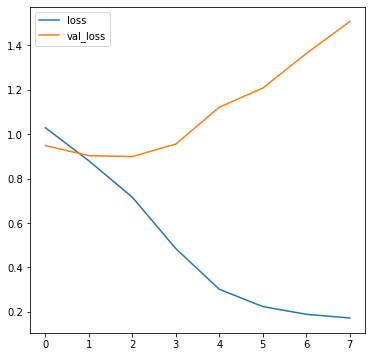

In [ ]:
hist_1_df = pd.DataFrame(base_history.history)
hist_1_df[['loss', 'val_loss']].plot();

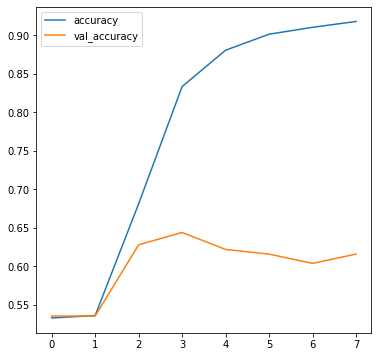

In [ ]:
hist_1_df[['accuracy', 'val_accuracy']].plot();

### 6.1.2 - Model Improvement with dropout to handling overfitting

In [ ]:
# Define Model
reduced_model= Sequential()
reduced_model.add(text_vectorization)
reduced_model.add(embedding)
reduced_model.add(LSTM(3))
reduced_model.add(Dense(3, activation='relu'))
reduced_model.add(Dropout(0.9))
reduced_model.add(Dense(3, activation='relu'))
reduced_model.add(Dropout(0.9))
reduced_model.add(Dense(3, activation='softmax'))

In [ ]:
reduced_history = deep_model(reduced_model)

Epoch 1/300
70/70 [==============================] - 6s 29ms/step - loss: 1.0817 - accuracy: 0.5316 - val_loss: 1.0658 - val_accuracy: 0.5352
Epoch 2/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0577 - accuracy: 0.5372 - val_loss: 1.0428 - val_accuracy: 0.5352
Epoch 3/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0351 - accuracy: 0.5387 - val_loss: 1.0262 - val_accuracy: 0.5352
Epoch 4/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0236 - accuracy: 0.5376 - val_loss: 1.0131 - val_accuracy: 0.5352
Epoch 5/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0112 - accuracy: 0.5419 - val_loss: 1.0044 - val_accuracy: 0.5352
Epoch 6/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0024 - accuracy: 0.5392 - val_loss: 0.9975 - val_accuracy: 0.5352
Epoch 7/300
70/70 [==============================] - 1s 18ms/step - loss: 0.9978 - accuracy: 0.5414 - val_loss: 0.9925 - val_accuracy: 0.5352
Epoch 

#### 6.1.2 - Model Evaluation

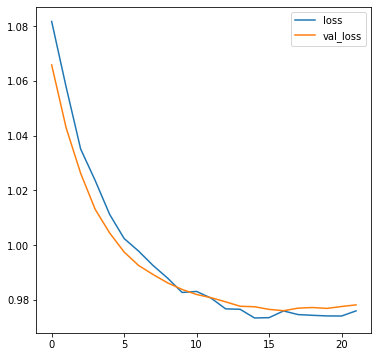

In [ ]:
hist_2_df = pd.DataFrame(reduced_history.history)
hist_2_df[['loss', 'val_loss']].plot();

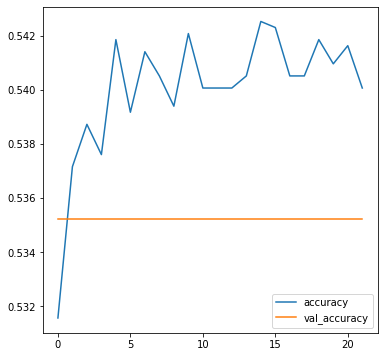

In [ ]:
hist_2_df[['accuracy', 'val_accuracy']].plot();

### 6.1.3 - Model Improvement with dropout and regularization

In [ ]:
# Define Model
drop_model= Sequential()
drop_model.add(text_vectorization)
drop_model.add(embedding)
drop_model.add(LSTM(3))
# Layer 1
drop_model.add(Dense(9,kernel_regularizer=regularizers.l2(0.001) ,activation='relu'))
drop_model.add(Dropout(0.9))
# Layer 2
drop_model.add(layers.Dense(9, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
drop_model.add(layers.Dropout(0.9))
drop_model.add(Dense(3, activation='softmax'))

In [ ]:
drop_history = deep_model(drop_model)

Epoch 1/300
70/70 [==============================] - 4s 26ms/step - loss: 1.0902 - accuracy: 0.5197 - val_loss: 1.0604 - val_accuracy: 0.5352
Epoch 2/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0555 - accuracy: 0.5347 - val_loss: 1.0326 - val_accuracy: 0.5352
Epoch 3/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0331 - accuracy: 0.5354 - val_loss: 1.0128 - val_accuracy: 0.5352
Epoch 4/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0208 - accuracy: 0.5372 - val_loss: 1.0045 - val_accuracy: 0.5352
Epoch 5/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0149 - accuracy: 0.5383 - val_loss: 0.9983 - val_accuracy: 0.5352
Epoch 6/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0082 - accuracy: 0.5401 - val_loss: 0.9937 - val_accuracy: 0.5352
Epoch 7/300
70/70 [==============================] - 1s 18ms/step - loss: 0.9955 - accuracy: 0.5448 - val_loss: 0.9866 - val_accuracy: 0.5352
Epoch 

#### 6.1.3 - Model Evaluation

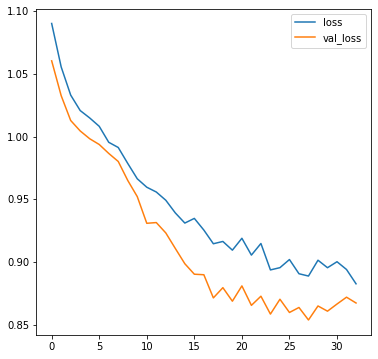

In [ ]:
hist_3_df = pd.DataFrame(drop_history.history)
hist_3_df[['loss', 'val_loss']].plot();

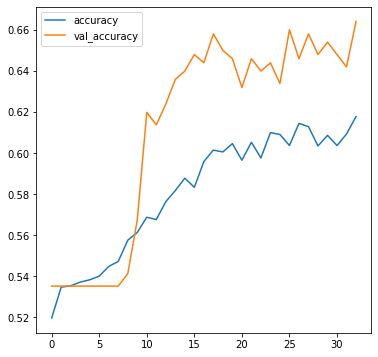

In [ ]:
hist_3_df[['accuracy', 'val_accuracy']].plot();

## 6.2 - Base Model GRU

In [ ]:
# Define Model
model_4 = Sequential()
model_4.add(text_vectorization)
model_4.add(embedding)
model_4.add(GRU(5))
model_4.add(Dense(3, activation='softmax'))


model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_gru_default = deep_model(model_4)

Epoch 1/300
70/70 [==============================] - 4s 26ms/step - loss: 0.9452 - accuracy: 0.6573 - val_loss: 0.9208 - val_accuracy: 0.5875
Epoch 2/300
70/70 [==============================] - 1s 19ms/step - loss: 0.7157 - accuracy: 0.7473 - val_loss: 0.8494 - val_accuracy: 0.6197
Epoch 3/300
70/70 [==============================] - 1s 20ms/step - loss: 0.5094 - accuracy: 0.8342 - val_loss: 0.8127 - val_accuracy: 0.6378
Epoch 4/300
70/70 [==============================] - 2s 26ms/step - loss: 0.3695 - accuracy: 0.8762 - val_loss: 0.8383 - val_accuracy: 0.6338
Epoch 5/300
70/70 [==============================] - 1s 19ms/step - loss: 0.2906 - accuracy: 0.8948 - val_loss: 0.8896 - val_accuracy: 0.6197
Epoch 6/300
70/70 [==============================] - 1s 19ms/step - loss: 0.2441 - accuracy: 0.9020 - val_loss: 0.9464 - val_accuracy: 0.6076
Epoch 7/300
70/70 [==============================] - 1s 20ms/step - loss: 0.2138 - accuracy: 0.9022 - val_loss: 1.0023 - val_accuracy: 0.6117
Epoch 

### 6.2.1 - Model Evaluation

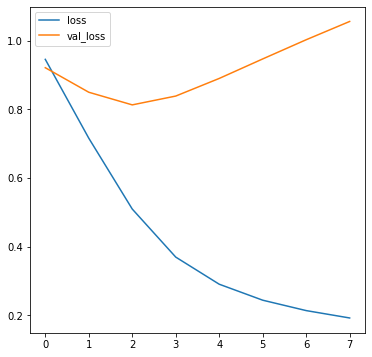

In [ ]:
hist_gru_df = pd.DataFrame(history_gru_default.history)
hist_gru_df[['loss', 'val_loss']].plot();

The model looks overfitting

### 6.2.2 - Model Improvement with dropout to handling overfitting

In [ ]:
reduced_gru_model= Sequential()
reduced_gru_model.add(text_vectorization)
reduced_gru_model.add(embedding)
reduced_gru_model.add(GRU(5))
reduced_gru_model.add(Dense(3, activation='relu'))
reduced_gru_model.add(Dropout(0.9))
reduced_gru_model.add(Dense(3, activation='relu'))
reduced_gru_model.add(Dropout(0.9))
reduced_gru_model.add(Dense(3, activation='softmax'))

In [ ]:
hist_gru_reduced = deep_model(reduced_gru_model)

Epoch 1/300
70/70 [==============================] - 4s 27ms/step - loss: 1.0862 - accuracy: 0.5295 - val_loss: 1.0718 - val_accuracy: 0.5352
Epoch 2/300
70/70 [==============================] - 1s 20ms/step - loss: 1.0624 - accuracy: 0.5358 - val_loss: 1.0527 - val_accuracy: 0.5352
Epoch 3/300
70/70 [==============================] - 1s 20ms/step - loss: 1.0432 - accuracy: 0.5358 - val_loss: 1.0346 - val_accuracy: 0.5352
Epoch 4/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0284 - accuracy: 0.5358 - val_loss: 1.0188 - val_accuracy: 0.5352
Epoch 5/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0162 - accuracy: 0.5358 - val_loss: 1.0114 - val_accuracy: 0.5352
Epoch 6/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0078 - accuracy: 0.5358 - val_loss: 1.0039 - val_accuracy: 0.5352
Epoch 7/300
70/70 [==============================] - 1s 20ms/step - loss: 0.9989 - accuracy: 0.5358 - val_loss: 0.9962 - val_accuracy: 0.5352
Epoch 

#### 6.2.2 - Model Evaluation

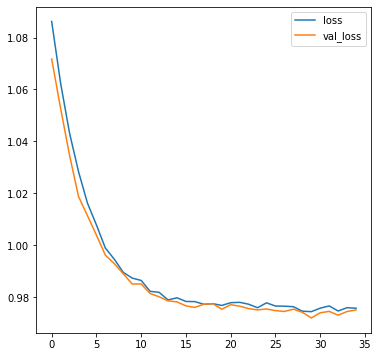

In [ ]:
gru_reduced = pd.DataFrame(hist_gru_reduced.history)
gru_reduced[['loss', 'val_loss']].plot();

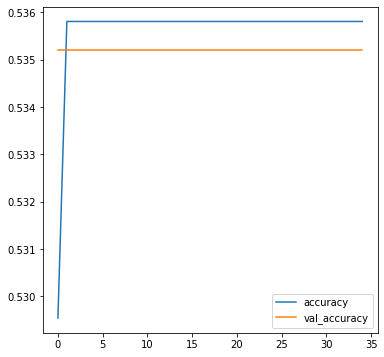

In [ ]:
gru_reduced[['accuracy', 'val_accuracy']].plot();

### 6.2.3 - Model Improvement with dropout and regularization

In [ ]:
reg_gru= Sequential()
reg_gru.add(text_vectorization)
reg_gru.add(embedding)
reg_gru.add(GRU(5))
# Layer 1
reg_gru.add(Dense(9,kernel_regularizer=regularizers.l2(0.001) ,activation='relu'))
reg_gru.add(Dropout(0.9))
# Layer 2
reg_gru.add(layers.Dense(9, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
reg_gru.add(layers.Dropout(0.9))
reg_gru.add(Dense(3, activation='softmax'))

In [ ]:
last_history = deep_model(reg_gru)

Epoch 1/300
70/70 [==============================] - 4s 27ms/step - loss: 1.0951 - accuracy: 0.5239 - val_loss: 1.0659 - val_accuracy: 0.5352
Epoch 2/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0595 - accuracy: 0.5313 - val_loss: 1.0369 - val_accuracy: 0.5352
Epoch 3/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0343 - accuracy: 0.5309 - val_loss: 1.0185 - val_accuracy: 0.5352
Epoch 4/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0129 - accuracy: 0.5336 - val_loss: 1.0060 - val_accuracy: 0.5352
Epoch 5/300
70/70 [==============================] - 1s 19ms/step - loss: 1.0121 - accuracy: 0.5331 - val_loss: 1.0024 - val_accuracy: 0.5352
Epoch 6/300
70/70 [==============================] - 1s 19ms/step - loss: 0.9997 - accuracy: 0.5349 - val_loss: 0.9921 - val_accuracy: 0.5352
Epoch 7/300
70/70 [==============================] - 1s 19ms/step - loss: 0.9783 - accuracy: 0.5333 - val_loss: 0.9827 - val_accuracy: 0.5352
Epoch 

#### 6.2.3 -  Model Evaluation

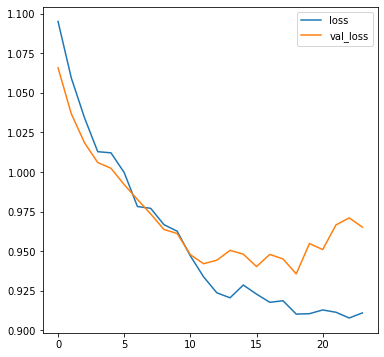

In [ ]:
gru_reduced_reg = pd.DataFrame(last_history.history)
gru_reduced_reg[['loss', 'val_loss']].plot();

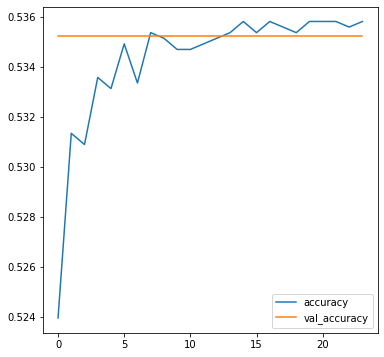

In [ ]:
gru_reduced_reg[['accuracy', 'val_accuracy']].plot();


---

# 7.Model Conclusion

1. with the default LSTM model, the model produces very overfitting results, it can be seen from the plotting results where the lines are far apart from each other

2. When optimization is carried out by entering drop outs in it, good results are given, where the results show no overfitting because the lines are not far from each other

3. When optimization with regularization is added, good results are obtained on `val loss` but we get poor results on accuracy which looks like underfitting

4. With the GRU model, we get the same results as the default model, which is where the results are very overfitting, we can see that the plots are far apart from each other.

5. when the optimization is done, the results are not much different, the model gives overfitting results, where the lines are far from each other, that also happens to the accuracy.

6. When the second optimization was carried out on the GRU model, overfitting occurred again, where the line did not provide a definite direction.

7. Based on the results of these two models, and all of their optimizations, it can be concluded that in this case I will use the LSTM model using handling overfitting with the dropout method only, because the results that can be seen from the plot look stable even though the accuracy is lacking, but this one is better than the others

---

## 7.1 - Model Pipeline

In [ ]:
callbacks_2= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 5, verbose=1),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only= True)

]

In [ ]:
# Build pipeline
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_oh)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_oh)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_oh)).batch(64)

# Define Model
model_pipeline= Sequential()
model_pipeline.add(text_vectorization)
model_pipeline.add(embedding)
model_pipeline.add(GRU(5))
model_pipeline.add(Dense(3, activation='relu'))
model_pipeline.add(Dropout(0.9))
model_pipeline.add(Dense(3, activation='relu'))
model_pipeline.add(Dropout(0.9))
model_pipeline.add(Dense(3, activation='softmax'))

model_pipeline.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist_pipeline = model_pipeline.fit(train_dataset,epochs=300, callbacks=callbacks,
                         validation_data=(val_dataset))

Epoch 1/300
70/70 [==============================] - 4s 26ms/step - loss: 1.0943 - accuracy: 0.5273 - val_loss: 1.0734 - val_accuracy: 0.5352
Epoch 2/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0645 - accuracy: 0.5354 - val_loss: 1.0536 - val_accuracy: 0.5352
Epoch 3/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0471 - accuracy: 0.5374 - val_loss: 1.0371 - val_accuracy: 0.5352
Epoch 4/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0311 - accuracy: 0.5365 - val_loss: 1.0242 - val_accuracy: 0.5352
Epoch 5/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0204 - accuracy: 0.5354 - val_loss: 1.0140 - val_accuracy: 0.5352
Epoch 6/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0100 - accuracy: 0.5356 - val_loss: 1.0061 - val_accuracy: 0.5352
Epoch 7/300
70/70 [==============================] - 1s 18ms/step - loss: 1.0048 - accuracy: 0.5360 - val_loss: 0.9999 - val_accuracy: 0.5352
Epoch 

In [ ]:
# Save model
model_pipeline.save('choosen_model')

INFO:tensorflow:Assets written to: choosen_model/assets


INFO:tensorflow:Assets written to: choosen_model/assets


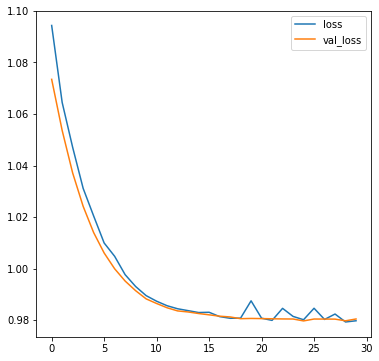

In [ ]:
model_pipeline_df = pd.DataFrame(hist_pipeline.history)
model_pipeline_df[['loss', 'val_loss']].plot();

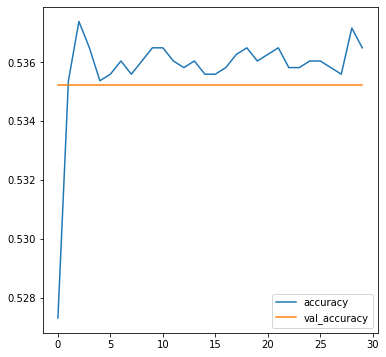

In [ ]:
model_pipeline_df[['accuracy', 'val_accuracy']].plot();

# 8.Model Inference

In [ ]:
data_inf

,Sentence,Sentiment
0,The company also said that its board of direct...,neutral
1,In 2007 Talentum will disclose three Interim R...,neutral
2,"`` While concerns remain longer term , size an...",positive
3,( I&H ) in a move to enhance growth .,positive
4,It also turned to earnings per share ( EPS ) o...,positive
5,"However , the orders received during the perio...",neutral
6,Coca-Cola was the market leader of manufacture...,neutral
7,"$SLW is down, but weekly $34 calls (-28.95%), ...",positive
8,"Nonwovens and specialty papers , made by Ahlst...",neutral
9,Finnish construction company YIT Oyj said on N...,positive


In [ ]:
load_model = keras.models.load_model("choosen_model")

In [ ]:
y_pred_inf = load_model.predict(data_inf['Sentiment'])
y_pred_inf

array([[0.14853166, 0.5376128 , 0.31385556],
       [0.14853166, 0.5376128 , 0.31385556],
       [0.15070711, 0.4924583 , 0.35683453],
       [0.15070711, 0.4924583 , 0.35683453],
       [0.15070711, 0.4924583 , 0.35683453],
       [0.14853166, 0.5376128 , 0.31385556],
       [0.14853166, 0.5376128 , 0.31385556],
       [0.15070711, 0.4924583 , 0.35683453],
       [0.14853166, 0.5376128 , 0.31385556],
       [0.15070711, 0.4924583 , 0.35683453]], dtype=float32)

In [ ]:
y_pred_inf = y_pred_inf.argmax(axis=1)
y_pred_inf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Sentiment-Prediction'])
y_pred_inf

,Sentiment-Prediction
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
data_inf_concat = pd.concat([data_inf, y_pred_inf], axis=1)
data_inf_concat

,Sentence,Sentiment,Sentiment-Prediction
0,The company also said that its board of direct...,neutral,1
1,In 2007 Talentum will disclose three Interim R...,neutral,1
2,"`` While concerns remain longer term , size an...",positive,1
3,( I&H ) in a move to enhance growth .,positive,1
4,It also turned to earnings per share ( EPS ) o...,positive,1
5,"However , the orders received during the perio...",neutral,1
6,Coca-Cola was the market leader of manufacture...,neutral,1
7,"$SLW is down, but weekly $34 calls (-28.95%), ...",positive,1
8,"Nonwovens and specialty papers , made by Ahlst...",neutral,1
9,Finnish construction company YIT Oyj said on N...,positive,1


# 9.Overall Conclusion

---

1. Sentences that have negative, neutral or positive sentiments have the same distribution, which is skewed to the right

2. Each sentence mostly has 20 words

3. Based on the target, most sentences are detected as neutral sentences and then followed by sentences with positive connotations

4. There are 119 unique sentences, which also include symbols that are not needed, so they will be cleaned, so as not to interfere with the prediction results.

5. with the default LSTM model, the model produces very overfitting results, it can be seen from the plotting results where the lines are far apart from each other

6. When optimization is carried out by entering drop outs in it, good results are given, where the results show no overfitting because the lines are not far from each other

7. When optimization with regularization is added, good results are obtained on `val loss` but we get poor results on accuracy which looks like underfitting

8. With the GRU model, we get the same results as the default model, which is where the results are very overfitting, we can see that the plots are far apart from each other.

9. when the optimization is done, the results are not much different, the model gives overfitting results, where the lines are far from each other, that also happens to the accuracy.

10. When the second optimization was carried out on the GRU model, overfitting occurred again, where the line did not provide a definite direction.

11. Based on the results of these two models, and all of their optimizations, it can be concluded that in this case I will use the LSTM model using handling overfitting with the dropout method only, because the results that can be seen from the plot look stable even though the accuracy is lacking, but this one is better than the others

---